In [7]:
from IPython.display import Image

# Napari plugin for Morphodynamics

In addition to the notebook interface, the package also offers a napari interface to run the software. Once the package is installed you just have to open napari, either like here in a notebook, or simply by typing ```napari``` in your CLI. Then go to the plugins menu and select the MorphoWidget plugin:

In [1]:
import napari

In [3]:
viewer = napari.Viewer()

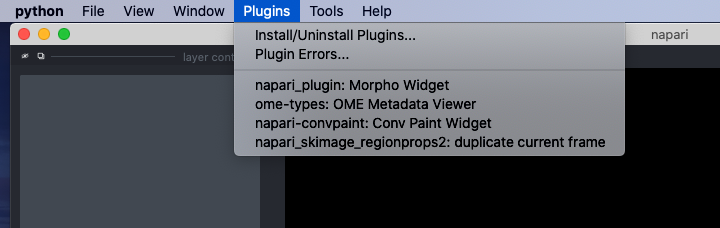

In [6]:
Image("../images/plugin_install.png")

## The interface

The interface allows you to do the following steps:

- Select folders where to look for data and where to save the analysis
- Visualize time-lapse datasets
- Define segmentation parameters: method, number of windows etc.
- If needed, define a configuration for distributed computing via Dask
- Train a pixel classififer to segment the data
- Reload a previously analysis

## Steps to follow

If you want to analyze a experiment, you can simply follow the steps in the ```Main``` panel:

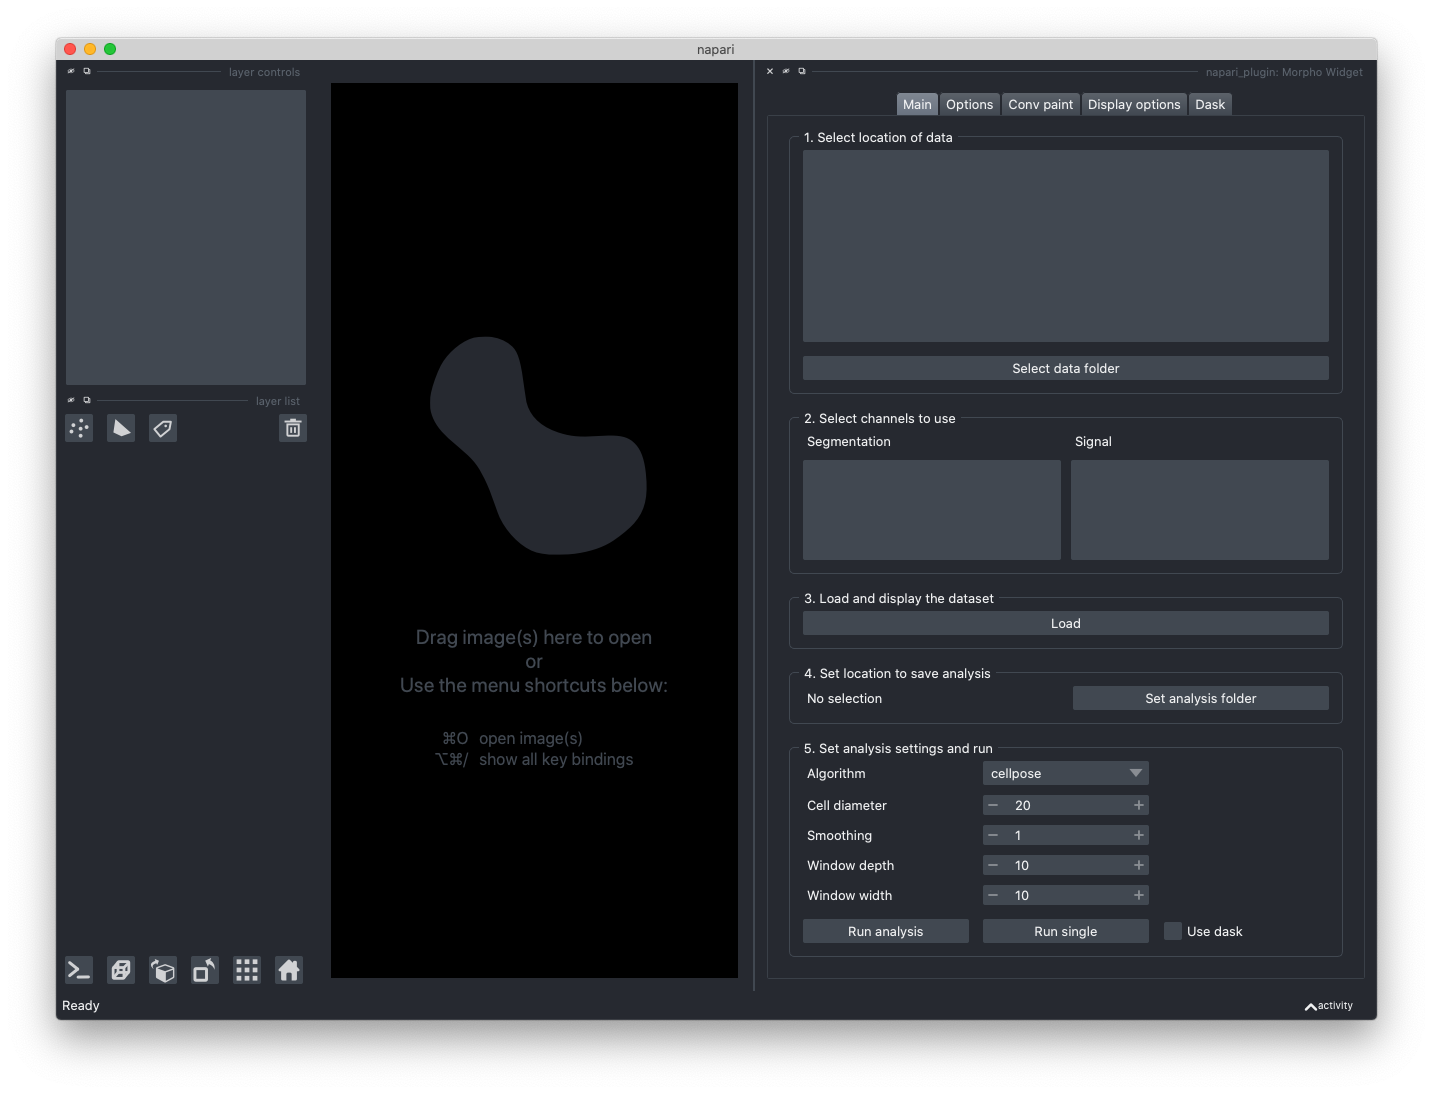

In [9]:
Image("../images/main_panel.png")

1. Select the folder containing your data.
2. Once a folder is selected, you can choose the channels to use for segmentation and from which to extract a signal. To select multiple signal channels, hold the Ctrl key.
3. Once channels are selected, you can click on ```Load```

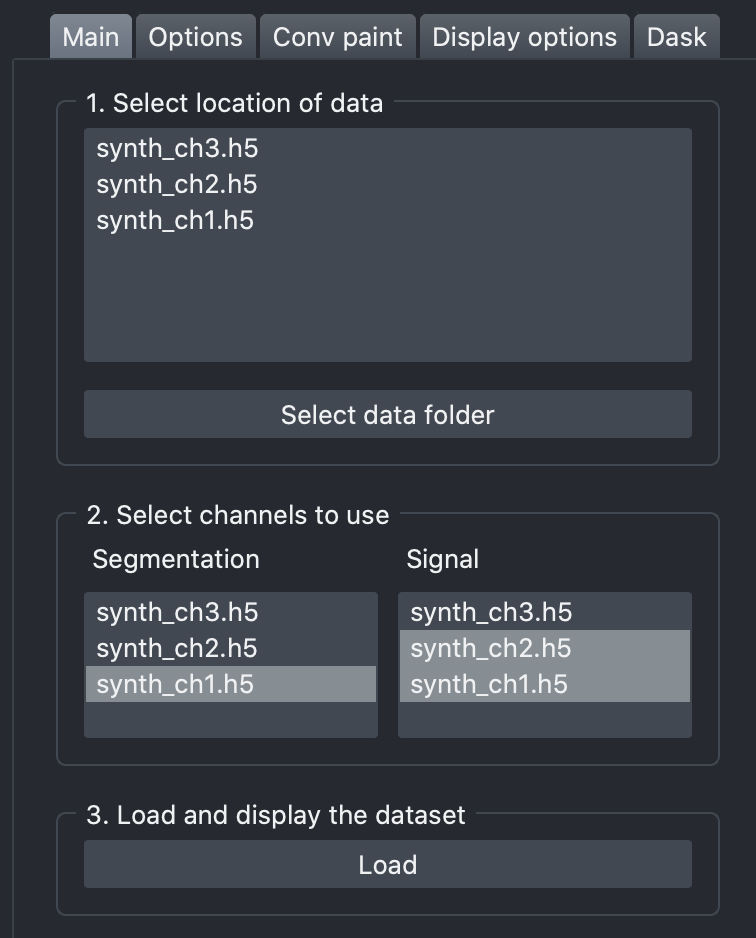

In [14]:
Image("../images/select_channels.png", width=300)

This loads the data and displays the segmentation channel as well as the signal channels in the viewer:

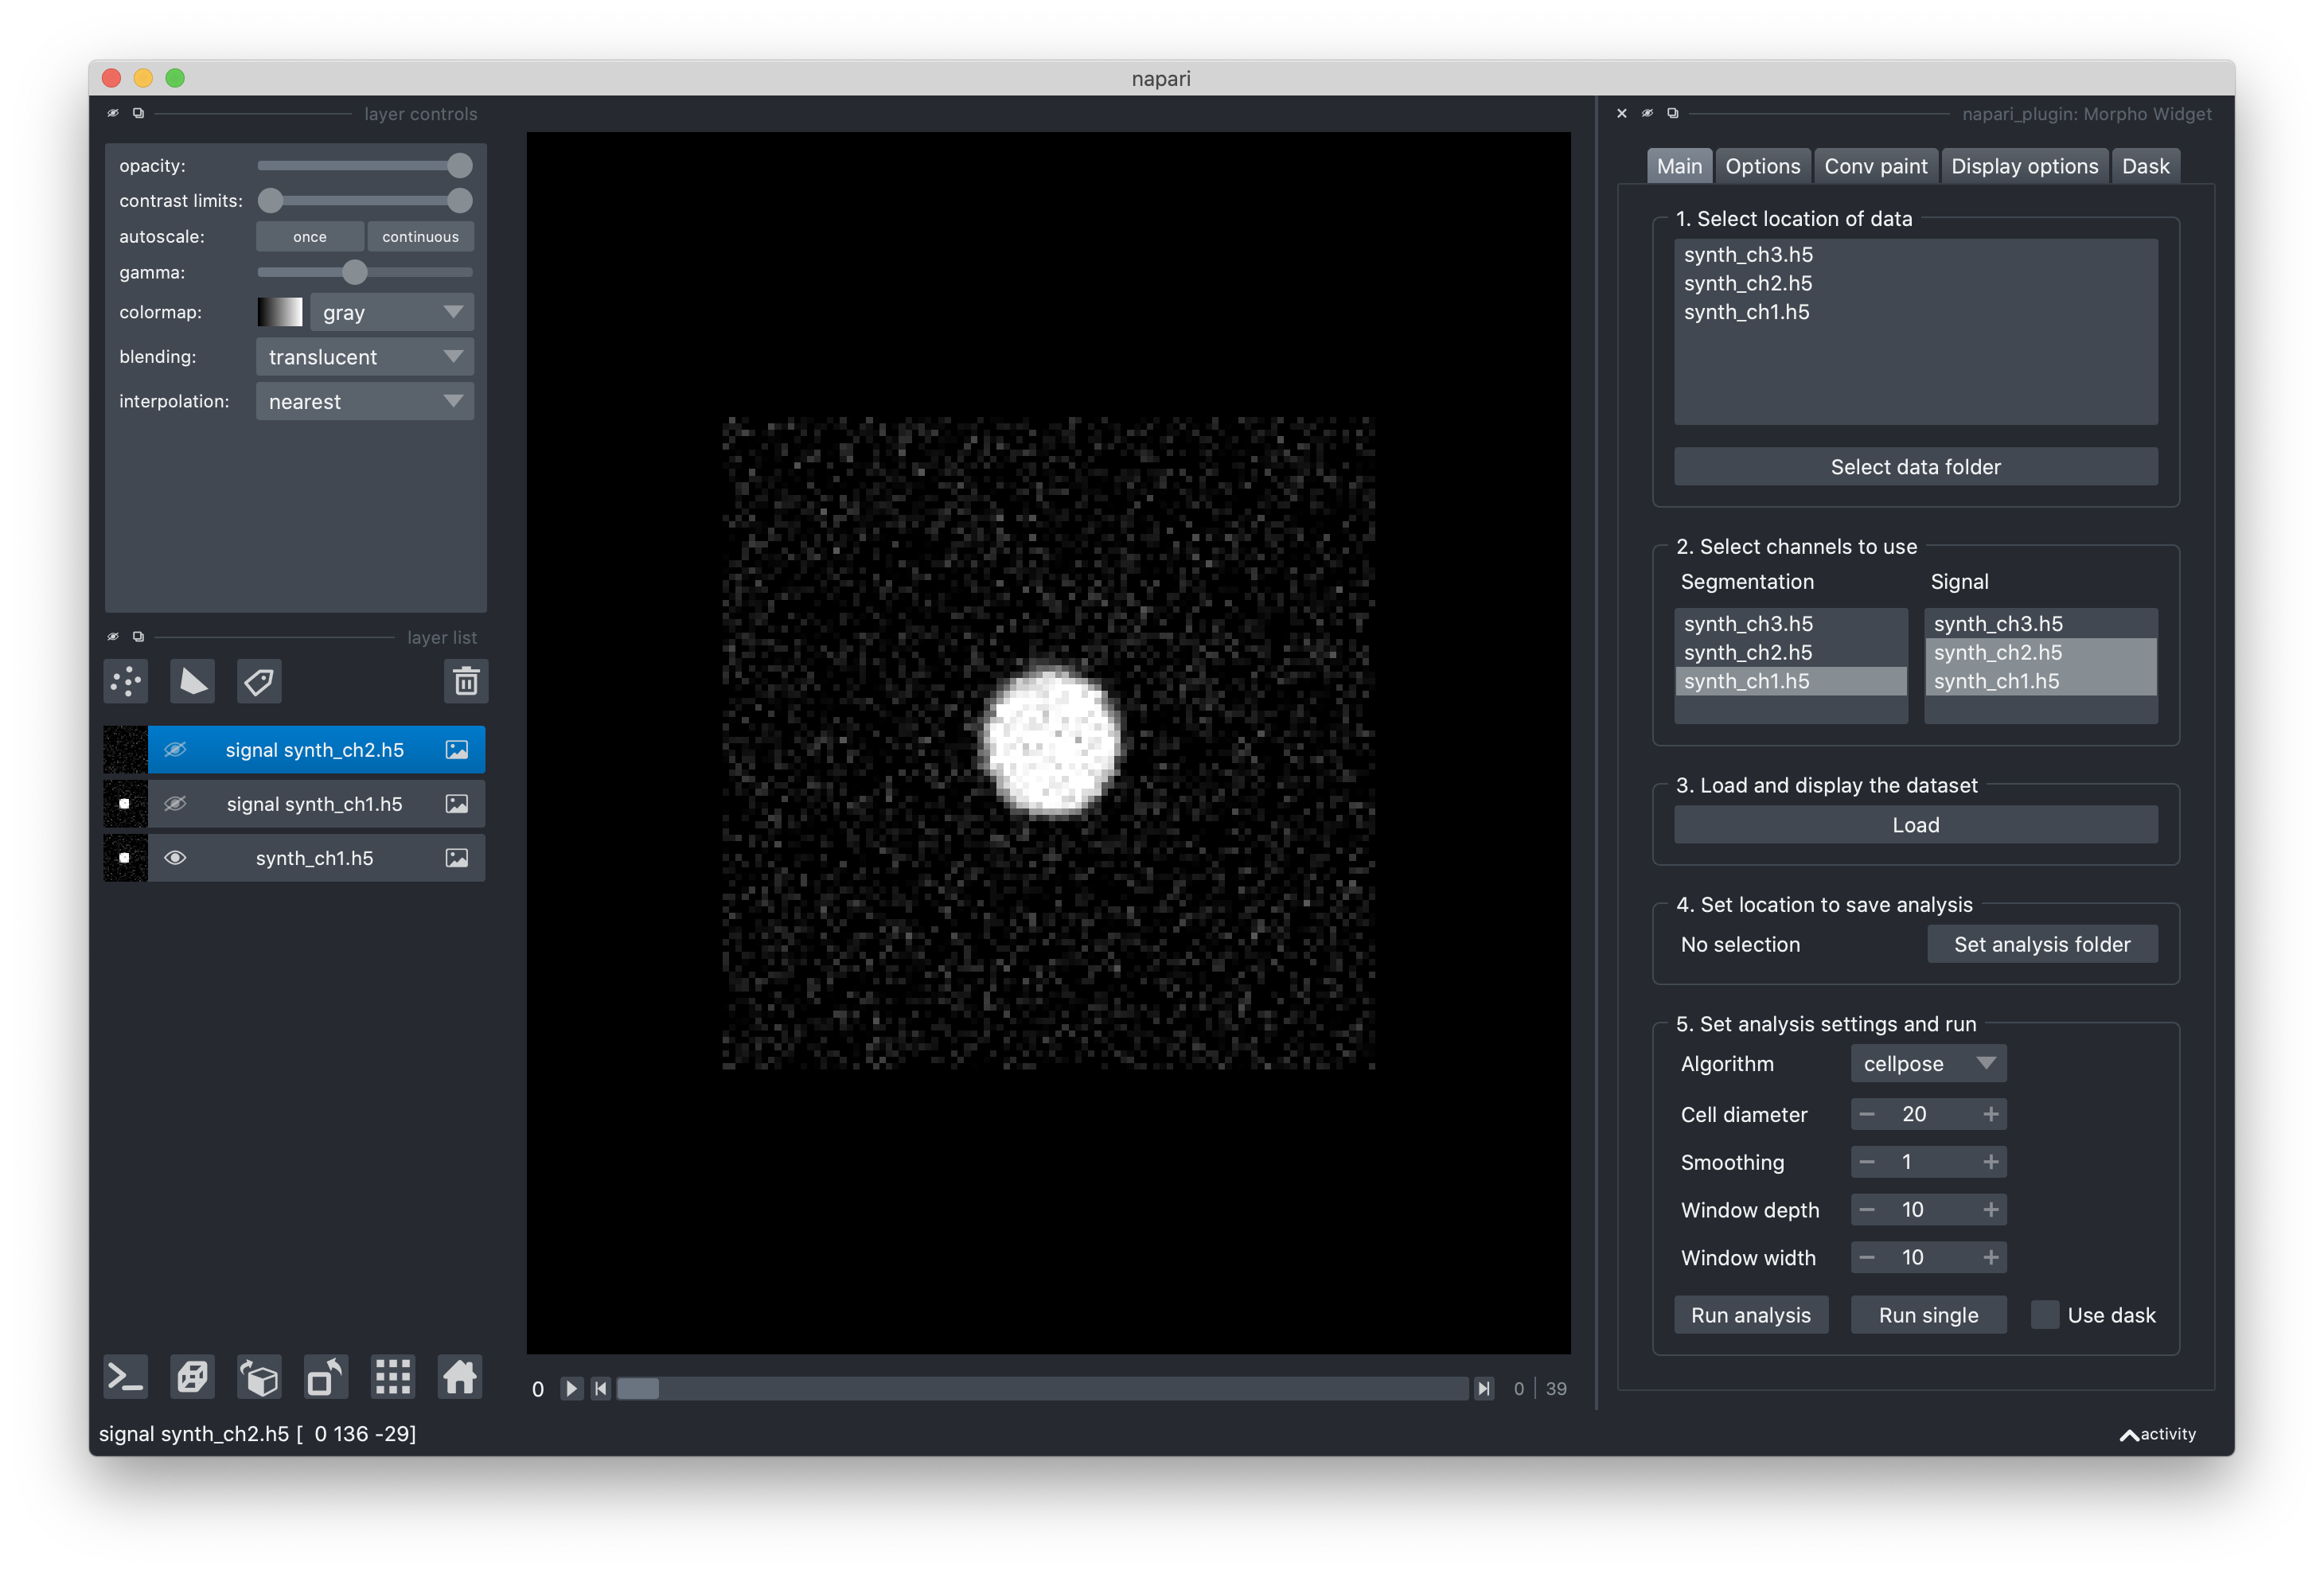

In [16]:
Image("../images/data_loaded.png", width=600)

4. Before running the analysis, you need to specify where outputs should be saved, as some data are exported during processing. Just hit ```Set analysis folder```.
5. Finally, set your segmentation parameters and run the analysis:
    - Algorithm
        - cellpose: uses the cellpose algorithm with the ```cyto``` model. You can adjust the estimated diameter.
        - ilastik: use pre-segmented data. To be able to use this you need to head to the ```Options``` tab and there ```Set a segmentation folder```.
        - farid: this is a crude threshold based segmentation
        - conv_paint: this is based on a pixel classifier trained on features extracted with layers of a Neural network and with manually annotated data. You can create such a classifier with the ```napari-convpaint``` plugin which is also directly accessible in the ```Conv paint``` tab.
    - Smoothing: this parameter controls how smooth the cell edge is made. Higher numbers mean smoother contours (but loosing details)
    - Window sizes: You can specify the desired depth and width of the window layers. Smaller depth means more layers of windows
    - Run analysis: hitting this button will start the full analysis process of the complete dataset.
    - Run single: this runs the segmentation and windowing process for the current frame. It allows you to check 1) if the segmentation is ok, 2) is the smoothing of the contour is correctly set, and 3) if the windows have the appropriate sizes
    - Use Dask: if you check this, a Dask cluster is started to run parts of the processing in paralle. You can set options in the ```Dask``` tab.